# Task 1: Exploratory Data Analysis
## CrediTrust Financial - Complaint Analysis System

This notebook analyzes the filtered complaint data from Task 1 processing.

**Prerequisite:** Run the processing script first:
```bash
cd /path/to/your/project
python run_task1.py
```


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Setup
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline


### Load the Filtered Data


In [2]:
# Load filtered data
data_path = Path('../data/processed/filtered_complaints.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
    print("✅ Successfully loaded filtered data")
    print(f"   Shape: {df.shape}")
    print(f"   Size: {len(df):,} complaints")
    print("\n📋 Columns:")
    for i, col in enumerate(df.columns, 1):
        print(f"   {i:2d}. {col}")
    print("\nFirst 3 rows:")
    display(df.head(3))
else:
    print("❌ Filtered data not found at:", data_path)
    print("Please run the processing script first!")
    print("Command: python run_task1.py")
    df = pd.DataFrame()  # Create empty dataframe


✅ Successfully loaded filtered data
   Shape: (914, 9)
   Size: 914 complaints

📋 Columns:
    1. Date received
    2. Product
    3. Sub-issue
    4. Consumer complaint narrative
    5. State
    6. Date sent to company
    7. Complaint ID
    8. product_category
    9. narrative

First 3 rows:


,Date received,Product,Sub-issue,Consumer complaint narrative,State,Date sent to company,Complaint ID,product_category,narrative
0,2025-06-13,credit card,Card opened without my consent or knowledge,a xxxx xxxx card was opened under my name by a...,TX,2025-06-13,14069121,Credit Card,a xxxx xxxx card was opened under my name by a...
1,2025-06-13,checking or savings account,Deposits and withdrawals,i made the mistake of using my wellsfargo debi...,ID,2025-06-13,14061897,Savings Account,i made the mistake of using my wellsfargo debi...
2,2025-06-12,credit card,Other problem,"dear cfpb, i have a secured credit card with c...",NY,2025-06-13,14047085,Credit Card,"dear cfpb, i have a secured credit card with c..."


### 1. Product Distribution Analysis


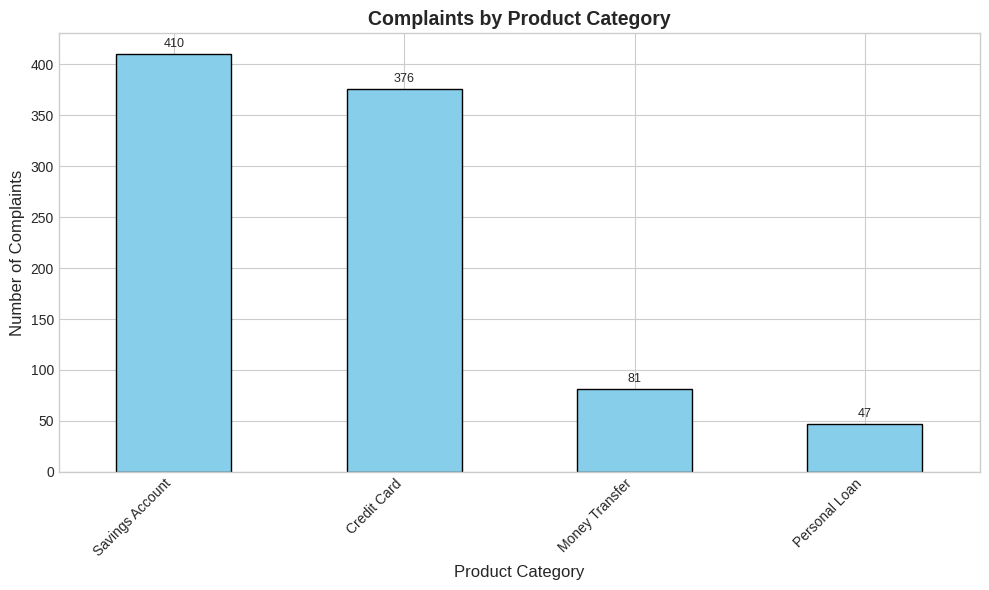

📊 Product Distribution Summary:
Total unique products: 4
Total complaints: 914

Detailed Distribution:
  Savings Account: 410 (44.9%)
  Credit Card: 376 (41.1%)
  Money Transfer: 81 (8.9%)
  Personal Loan: 47 (5.1%)


In [3]:
if len(df) > 0:
    # Find or create product category column
    if 'product_category' in df.columns:
        product_col = 'product_category'
    else:
        product_cols = [c for c in df.columns if 'product' in c.lower()]
        product_col = product_cols[0] if product_cols else None
        if product_col:
            print(f"Using column: {product_col}")
        else:
            print("No product column found")

    if product_col:
        product_counts = df[product_col].value_counts()
        plt.figure(figsize=(10, 6))
        product_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Complaints by Product Category', fontsize=14, fontweight='bold')
        plt.xlabel('Product Category', fontsize=12)
        plt.ylabel('Number of Complaints', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        for i, (product, count) in enumerate(product_counts.items()):
            plt.text(i, count + max(product_counts) * 0.01, f"{count:,}",
                    ha='center', va='bottom', fontsize=9)
        plt.tight_layout()
        plt.show()
        print("📊 Product Distribution Summary:")
        print("=" * 40)
        print(f"Total unique products: {df[product_col].nunique()}")
        print(f"Total complaints: {len(df):,}")
        print("\nDetailed Distribution:")
        for product, count in product_counts.items():
            pct = count / len(df) * 100
            print(f"  {product}: {count:,} ({pct:.1f}%)")
else:
    print("No data available")


### 2. Narrative Length Analysis


Analyzing narrative column: Consumer complaint narrative


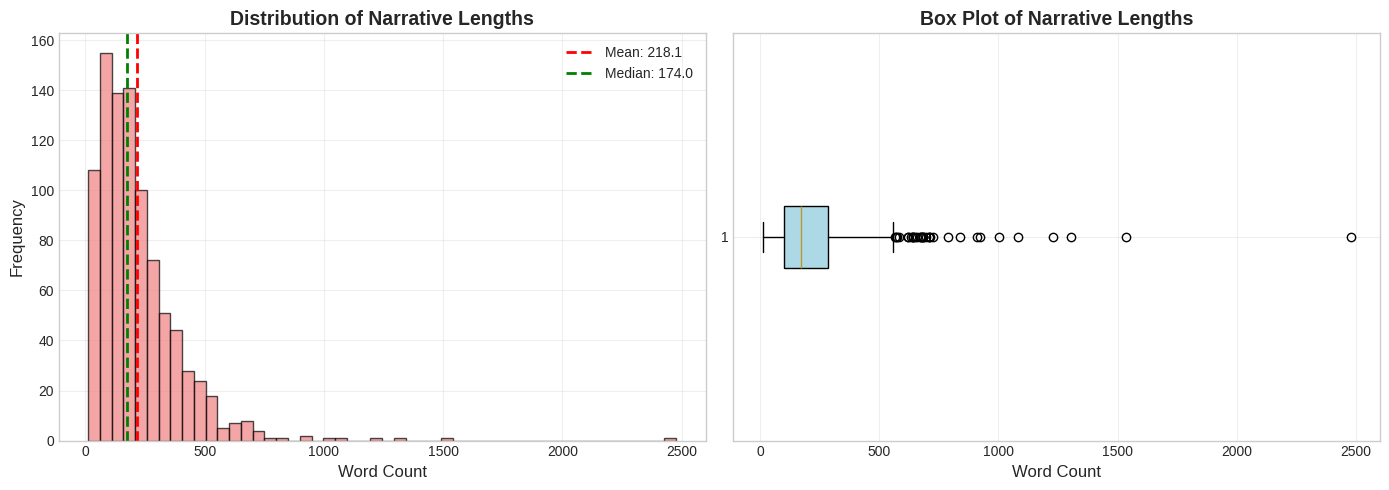


📏 Narrative Length Statistics:
Minimum: 11 words
Maximum: 2477 words
Mean: 218.1 words
Median: 174.0 words
Standard Deviation: 183.4 words

📊 Length Categories:
  Very short (<10 words): 0 (0.0%)
  Normal length: 861 (94.2%)
  Very long (>500 words): 53 (5.8%)


In [4]:
if len(df) > 0:
    narrative_cols = [c for c in df.columns if 'narrative' in c.lower()]
    if not narrative_cols:
        narrative_cols = [c for c in df.columns if 'complaint' in c.lower()]
    if narrative_cols:
        narrative_col = narrative_cols[0]
        print(f"Analyzing narrative column: {narrative_col}")
        df['word_count'] = df[narrative_col].astype(str).str.split().str.len()
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        axes[0].hist(df['word_count'].dropna(), bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
        axes[0].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['word_count'].mean():.1f}")
        axes[0].axvline(df['word_count'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df['word_count'].median():.1f}")
        axes[0].set_xlabel('Word Count', fontsize=12)
        axes[0].set_ylabel('Frequency', fontsize=12)
        axes[0].set_title('Distribution of Narrative Lengths', fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        axes[1].boxplot(df['word_count'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        axes[1].set_xlabel('Word Count', fontsize=12)
        axes[1].set_title('Box Plot of Narrative Lengths', fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        print("\n📏 Narrative Length Statistics:")
        print("=" * 40)
        print(f"Minimum: {df['word_count'].min():.0f} words")
        print(f"Maximum: {df['word_count'].max():.0f} words")
        print(f"Mean: {df['word_count'].mean():.1f} words")
        print(f"Median: {df['word_count'].median():.1f} words")
        print(f"Standard Deviation: {df['word_count'].std():.1f} words")
        short_threshold = 10
        long_threshold = 500
        very_short = (df['word_count'] < short_threshold).sum()
        normal = ((df['word_count'] >= short_threshold) & (df['word_count'] <= long_threshold)).sum()
        very_long = (df['word_count'] > long_threshold).sum()
        print("\n📊 Length Categories:")
        print(f"  Very short (<{short_threshold} words): {very_short:,} ({very_short / len(df) * 100:.1f}%)")
        print(f"  Normal length: {normal:,} ({normal / len(df) * 100:.1f}%)")
        print(f"  Very long (>{long_threshold} words): {very_long:,} ({very_long / len(df) * 100:.1f}%)")
    else:
        print("No narrative column found")
else:
    print("No data available")


### 3. Data Quality Check


🔍 Missing Values Analysis:
Columns with missing values:

           Missing_Count  Missing_Percentage
Sub-issue            126           13.785558
State                  5            0.547046


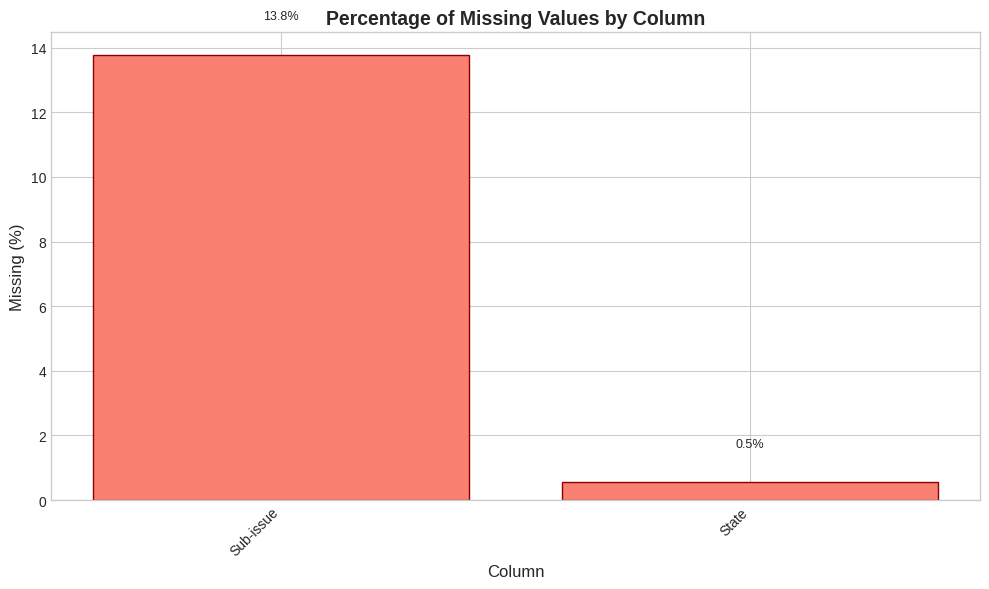


📋 Data Types:
Date received                   object
Product                         object
Sub-issue                       object
Consumer complaint narrative    object
State                           object
Date sent to company            object
Complaint ID                     int64
product_category                object
narrative                       object
word_count                       int64
dtype: object


In [5]:
if len(df) > 0:
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({'Missing_Count': missing, 'Missing_Percentage': missing_pct})
    missing_df = missing_df[missing_df['Missing_Count'] > 0]
    print("🔍 Missing Values Analysis:")
    print("=" * 40)
    if len(missing_df) > 0:
        print("Columns with missing values:\n")
        print(missing_df)
        plt.figure(figsize=(10, 6))
        bars = plt.bar(missing_df.index, missing_df['Missing_Percentage'], color='salmon', edgecolor='darkred')
        plt.title('Percentage of Missing Values by Column', fontsize=14, fontweight='bold')
        plt.xlabel('Column', fontsize=12)
        plt.ylabel('Missing (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.1f}%", ha='center', va='bottom', fontsize=9)
        plt.tight_layout()
        plt.show()
    else:
        print("✅ No missing values found in the dataset!")
    print("\n📋 Data Types:")
    print("=" * 40)
    print(df.dtypes)
else:
    print("No data available")


### 4. Text Cleaning Example


In [6]:
if len(df) > 0:
    narrative_cols = [c for c in df.columns if 'narrative' in c.lower()] or [c for c in df.columns if 'complaint' in c.lower()]
    if narrative_cols:
        narrative_col = narrative_cols[0]
        sample_idx = 0
        original_text = df[narrative_col].iloc[sample_idx]
        print("📝 Text Cleaning Example:")
        print("=" * 60)
        print("Original Complaint (first 400 characters):")
        print("-" * 60)
        print(original_text[:400])
        import re
        cleaned = original_text.lower()
        patterns = [
            r'i am writing to (file|submit) (a|this) complaint',
            r'to whom it may concern',
            r'dear (sir|madam|customer service)',
            r'thank you for your attention',
            r'sincerely,|respectfully,|best regards,',
        ]
        for pattern in patterns:
            cleaned = re.sub(pattern, '', cleaned, flags=re.IGNORECASE)
        cleaned = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', '', cleaned)
        cleaned = re.sub(r'\s+', ' ', cleaned).strip()
        print("\n\nCleaned Version:")
        print("-" * 60)
        print(cleaned[:400])
        print("\n\n📊 Comparison:")
        print("-" * 60)
        print(f"Original length: {len(original_text)} characters")
        print(f"Cleaned length: {len(cleaned)} characters")
        print(f"Original words: {len(original_text.split())}")
        print(f"Cleaned words: {len(cleaned.split())}")
    else:
        print("No narrative column found")
else:
    print("No data available for text cleaning example")


📝 Text Cleaning Example:
Original Complaint (first 400 characters):
------------------------------------------------------------
a xxxx xxxx card was opened under my name by a fraudster. i received a notice from xxxx that an account was just opened under my name. i reached out to xxxx xxxx to state that this activity was unauthorized and not me. xxxx xxxx confirmed this was fraudulent and immediately closed the card. however, they have failed to remove this from the three credit agencies and this fraud is now impacting my c


Cleaned Version:
------------------------------------------------------------
a xxxx xxxx card was opened under my name by a fraudster. i received a notice from xxxx that an account was just opened under my name. i reached out to xxxx xxxx to state that this activity was unauthorized and not me. xxxx xxxx confirmed this was fraudulent and immediately closed the card. however, they have failed to remove this from the three credit agencies and this fraud is now impa